In [154]:
# ransac regression on a dataset with outliers
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

x = pd.read_csv('gdrive/My Drive/interp_data.csv', usecols=["dateTime","temp", "sal", "ftu","fluors","o2", "kd","par_0","par_1","par_2"], na_filter=False) 
x['dateTime'] = pd.to_datetime(x['dateTime'])
x = x.set_index('dateTime')

x_temp=x.iloc[:,0]
x_temp= pd.to_numeric(x_temp, errors='ignore')
y_sal=x.iloc[:,1]
y_sal=pd.to_numeric(y_sal,errors='ignore')
x_par1=x.iloc[:,7]
x_par1=pd.to_numeric(x_par1,errors='ignore')

x_ftu=x.iloc[:,2]
x_fluors=x.iloc[:,3]
x_02=x.iloc[:,4]
x_kd=x.iloc[:,5]
x_ftu= pd.to_numeric(x_ftu, errors='coerce')
x_fluors= pd.to_numeric(x_fluors, errors='coerce')
x_02= pd.to_numeric(x_02, errors='coerce')
x_kd=pd.to_numeric(x_kd,errors='coerce')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [157]:
temp_month = x_temp.resample('M').mean()
sal_month=y_sal.resample('M').mean()
par_month=x_par1.resample('M').mean()
ftu_month=x_ftu.resample('M').mean()
kd_month=x_kd.resample('M').mean()
x02_month=x_02.resample('M').mean()
fluors_month=x_fluors.resample('M').mean()

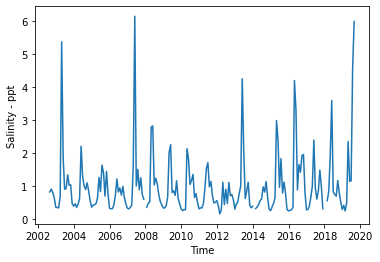

In [183]:
plt.plot(fluors_month)
plt.xlabel('Time')
plt.ylabel('Salinity - ppt')
plt.show()

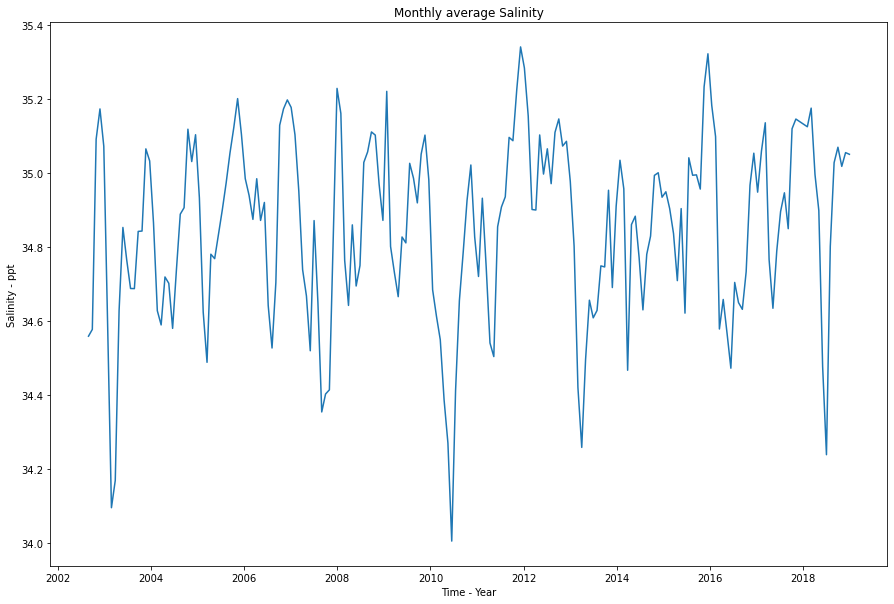

In [75]:
temp_month2 = temp_month.interpolate(method="linear", limit=1500, limit_direction='both',limit_area='inside') #5.7 days
sal_month2 = sal_month.interpolate(method="linear", limit=1500, limit_direction='both',limit_area='inside') #5.7 days
fig = plt.figure(figsize=(15, 10))
plt.plot(sal_month2)
plt.title('Monthly average Salinity')
plt.xlabel('Time - Year')
plt.ylabel('Salinity - ppt')
plt.show()

In [170]:
par_month_3=par_month[1:156] 
par_month_4=par_month[157:len(par_month)]
kd_month_3=kd_month[1:156]
kd_month_4=kd_month[157:len(kd_month)]

In [171]:
kd_month_4

dateTime
2015-09-30         NaN
2015-10-31         NaN
2015-11-30         NaN
2015-12-31         NaN
2016-01-31         NaN
2016-02-29         NaN
2016-03-31         NaN
2016-04-30         NaN
2016-05-31    0.429693
2016-06-30    0.412035
2016-07-31    0.403744
2016-08-31    0.555509
2016-09-30         NaN
2016-10-31    0.693755
2016-11-30    0.848475
2016-12-31    0.782854
2017-01-31    0.649851
2017-02-28    0.266563
2017-03-31    0.259342
2017-04-30    0.409013
2017-05-31    0.422635
2017-06-30    0.313786
2017-07-31    0.383655
2017-08-31    1.284034
2017-09-30    1.005450
2017-10-31    0.713665
2017-11-30    0.761711
2017-12-31         NaN
2018-01-31         NaN
2018-02-28    0.724262
2018-03-31    0.658589
2018-04-30    1.757728
2018-05-31    0.869282
2018-06-30    0.262527
2018-07-31    0.395039
2018-08-31    0.343416
2018-09-30    0.405247
2018-10-31    0.378353
2018-11-30    0.416232
2018-12-31    0.340446
2019-01-31    1.148882
2019-02-28    1.035809
2019-03-31         NaN
20

In [172]:
par_month3 = par_month_3.interpolate(method="polynomial", order=2) 
par_month4=par_month_4.interpolate(method='polynomial', order=2)
par_month5=pd.concat([par_month3,par_month4],axis=1)

kd_month3 = kd_month_3.interpolate(method="polynomial", order=2) 
kd_month4=kd_month_4.interpolate(method='polynomial', order=2)
kd_month5=pd.concat([kd_month3,kd_month4],axis=1)

In [143]:
par_month5

,par_1,par_1
dateTime,,
2002-09-30,148.007219,NaN
2002-10-31,61.493558,NaN
2002-11-30,16.873603,NaN
2002-12-31,11.172690,NaN
2003-01-31,46.501713,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN


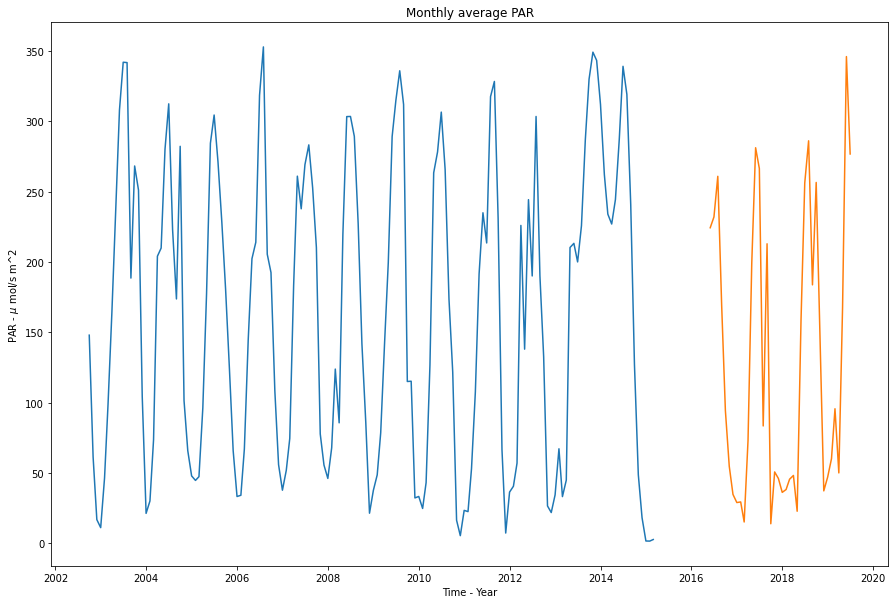

In [148]:
fig = plt.figure(figsize=(15, 10))
plt.plot(par_month5)
plt.title('Monthly average PAR')
plt.xlabel('Time - Year')
plt.ylabel('PAR - $\mu$ mol/s m^2')
plt.show()

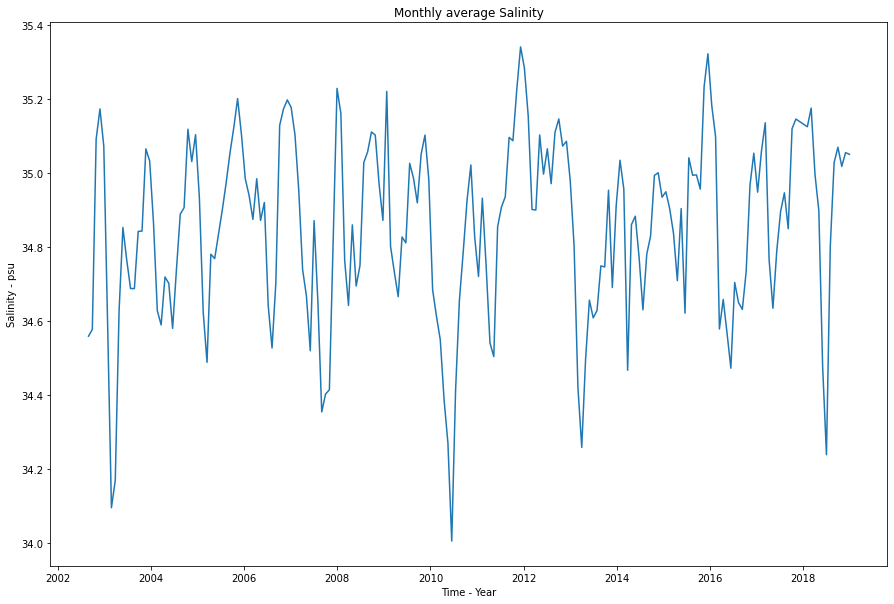

In [152]:
fig = plt.figure(figsize=(15, 10))
plt.plot(sal_month2)
plt.title('Monthly average Salinity')
plt.xlabel('Time - Year')
plt.ylabel('Salinity - psu')
plt.show()

In [12]:


slope, intercept, r, p, std_err = stats.linregress(temp_month, sal_month)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, temp_month))

plt.scatter(temp_month, sal_month)
plt.plot(temp_month, mymodel)
plt.show()

20.148

In [159]:
kd_month2 = kd_month.interpolate(method="polynomial", order=2) 

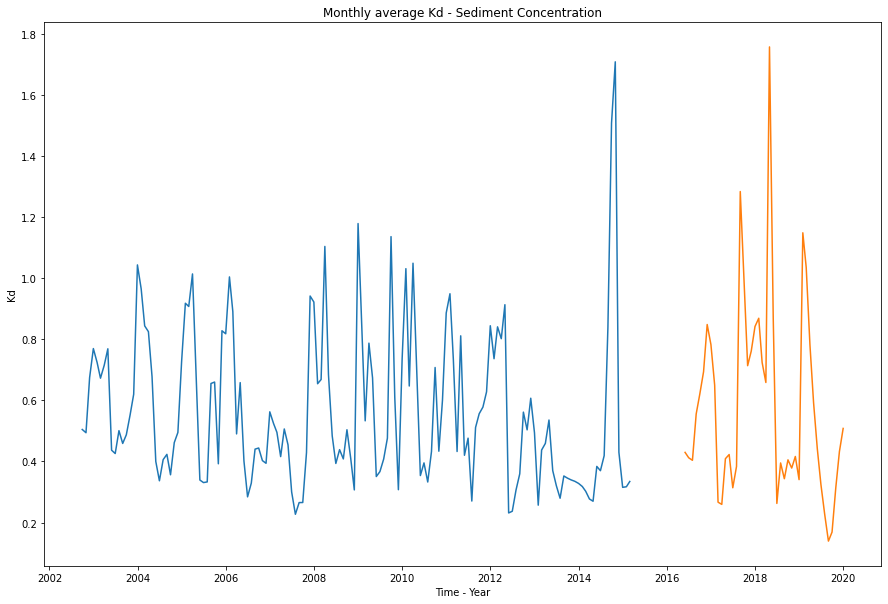

In [174]:
fig = plt.figure(figsize=(15, 10))
plt.plot(kd_month5)
plt.title('Monthly average Kd - Sediment Concentration')
plt.xlabel('Time - Year')
plt.ylabel('Kd')
plt.show()

In [186]:
x02_month2 = x02_month.interpolate(method="polynomial", order=2) 
ftu_month2 = ftu_month.interpolate(method="polynomial", order=2) 
fluors_month2 = fluors_month.interpolate(method="polynomial", order=2) 

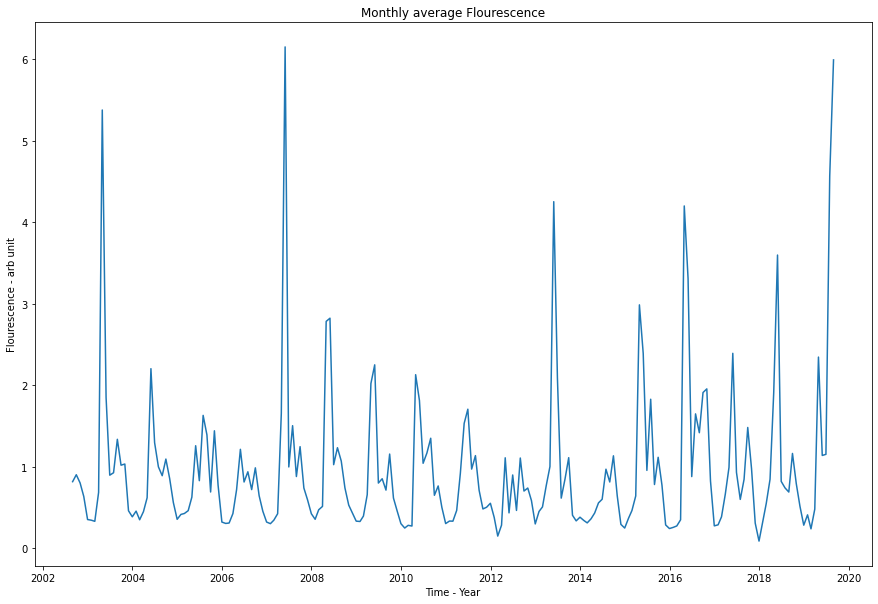

In [187]:
fig = plt.figure(figsize=(15, 10))
plt.plot(fluors_month2)
plt.title('Monthly average Flourescence')
plt.xlabel('Time - Year')
plt.ylabel('Flourescence - arb unit')
plt.show()